# Unsupervised Machine Learning - Clustering

### Importing Data and Libraries

### Cleaning Data

### Standardization

### Elbow Technique for K-Means clustering

### K-means Clustering

### Importing Data and Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import k-means library from scikit-learn
from sklearn.preprocessing import StandardScaler # Import StandardScaler for standardization
from sklearn.decomposition import PCA # Import PCA (Principal Components Analysis) for Standardization
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Importing Data
path = r'C:\Users\arafo\CareerFoundry\Hotel Booking Analysis'
df_checkedout = pd.read_csv(os.path.join(path, '02 - Data', 'Prepared Data', 'bookings_checkedout_after_regression.csv'), index_col = False)

In [3]:
# Display all columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# Ensure graphs displayed are in notebook without having to call them
%matplotlib inline

In [5]:
df_checkedout.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
2,2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
3,3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
4,4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.0,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4


In [6]:
# Remove first column again
df_checkedout = df_checkedout.drop(['Unnamed: 0'], axis = 1)

In [7]:
df_checkedout.shape

(61797, 33)

In [8]:
df_checkedout.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_name,region,waitlist_flag,total_guests,total_stay_time
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,Europe,No Wait,2,0
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,Europe,No Wait,2,2
4,Resort Hotel,0,35,2015,July,27,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,145.0,0,0,Check-Out,2015-07-05,Portugal,Europe,No Wait,2,4


### Cleaning Data

In [10]:
# Changing Arrival Date Month from Strings to Numbers
df_checkedout['arrival_date_month'] = df_checkedout['arrival_date_month'].replace(['January', 'February','March','April',
                                                                                'May','June','July','August','September',
                                                                                 'October','November','December'],
                                                                                ['1', '2','3','4',
                                                                                '5','6','7','8','9',
                                                                                '10','11','12'])

In [11]:
df_checkedout['arrival_date_month'].value_counts()

8     7513
7     6765
5     5809
3     5542
4     5392
6     5307
10    5051
9     4821
2     4573
11    3822
12    3655
1     3547
Name: arrival_date_month, dtype: int64

In [13]:
df_checkedout['hotel'].value_counts()

City Hotel      36567
Resort Hotel    25230
Name: hotel, dtype: int64

In [14]:
# Add new column for hotel
df_checkedout['hotel_type'] = [0 if x == 'Resort Hotel' else 1 for x in df_checkedout['hotel']]

In [16]:
df_checkedout['hotel_type'].value_counts()

1    36567
0    25230
Name: hotel_type, dtype: int64

In [17]:
# Dropping categorical columns
df_checkedout.drop(['hotel','meal','country','market_segment','distribution_channel',
                    'deposit_type','customer_type','reservation_status',
                   'country_name', 'region', 'waitlist_flag'], axis = 1, inplace = True)

In [18]:
df_checkedout.shape

(61797, 23)

In [19]:
df_checkedout.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_guests,total_stay_time,hotel_type
0,0,342,2015,7,27,1,0,0,2,0,0,0,0,0,3,0,0.0,0,0,2015-07-01,2,0,0
1,0,737,2015,7,27,1,0,0,2,0,0,0,0,0,4,0,0.0,0,0,2015-07-01,2,0,0
2,0,0,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,107.0,0,0,2015-07-03,2,2,0
3,0,9,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,103.0,0,1,2015-07-03,2,2,0
4,0,35,2015,7,27,1,0,4,2,0,0,0,0,0,0,0,145.0,0,0,2015-07-05,2,4,0


In [20]:
# Check for nulls
df_checkedout.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
average_daily_rate                0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
total_guests                      0
total_stay_time                   0
hotel_type                        0
dtype: int64

In [21]:
# Checking for data types
df_checkedout.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
average_daily_rate                float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status_date            object
total_guests                        int64
total_stay_time                     int64
hotel_type                          int64
dtype: object

In [26]:
# Change arrival date month to int
df_checkedout['arrival_date_month'] = df_checkedout['arrival_date_month'].astype(int)

In [27]:
df_checkedout['arrival_date_month'].dtypes

dtype('int32')

In [28]:
# Drop non-numeric columns
df_checkedout.drop(['reservation_status_date'], axis = 1, inplace = True)

### Standardization

In [29]:
# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_checkedout)

In [30]:
# Fit standardized data to PCA
pca = PCA()
pca.fit(df_standardized)

PCA()

In [31]:
# Show how much variance is explained by each component
pca.explained_variance_ratio_

array([1.52515826e-01, 1.12427470e-01, 1.11672550e-01, 8.21050013e-02,
       6.17471894e-02, 5.36104443e-02, 4.97200682e-02, 4.78667660e-02,
       4.76204856e-02, 4.56180505e-02, 4.08294589e-02, 3.66306833e-02,
       3.50573746e-02, 3.30089254e-02, 2.92762768e-02, 2.28187814e-02,
       1.88605303e-02, 1.85947741e-02, 1.93439020e-05, 1.30057486e-31,
       6.33059213e-32, 0.00000000e+00])

Text(0, 0.5, 'Cumulative Explained Variance')

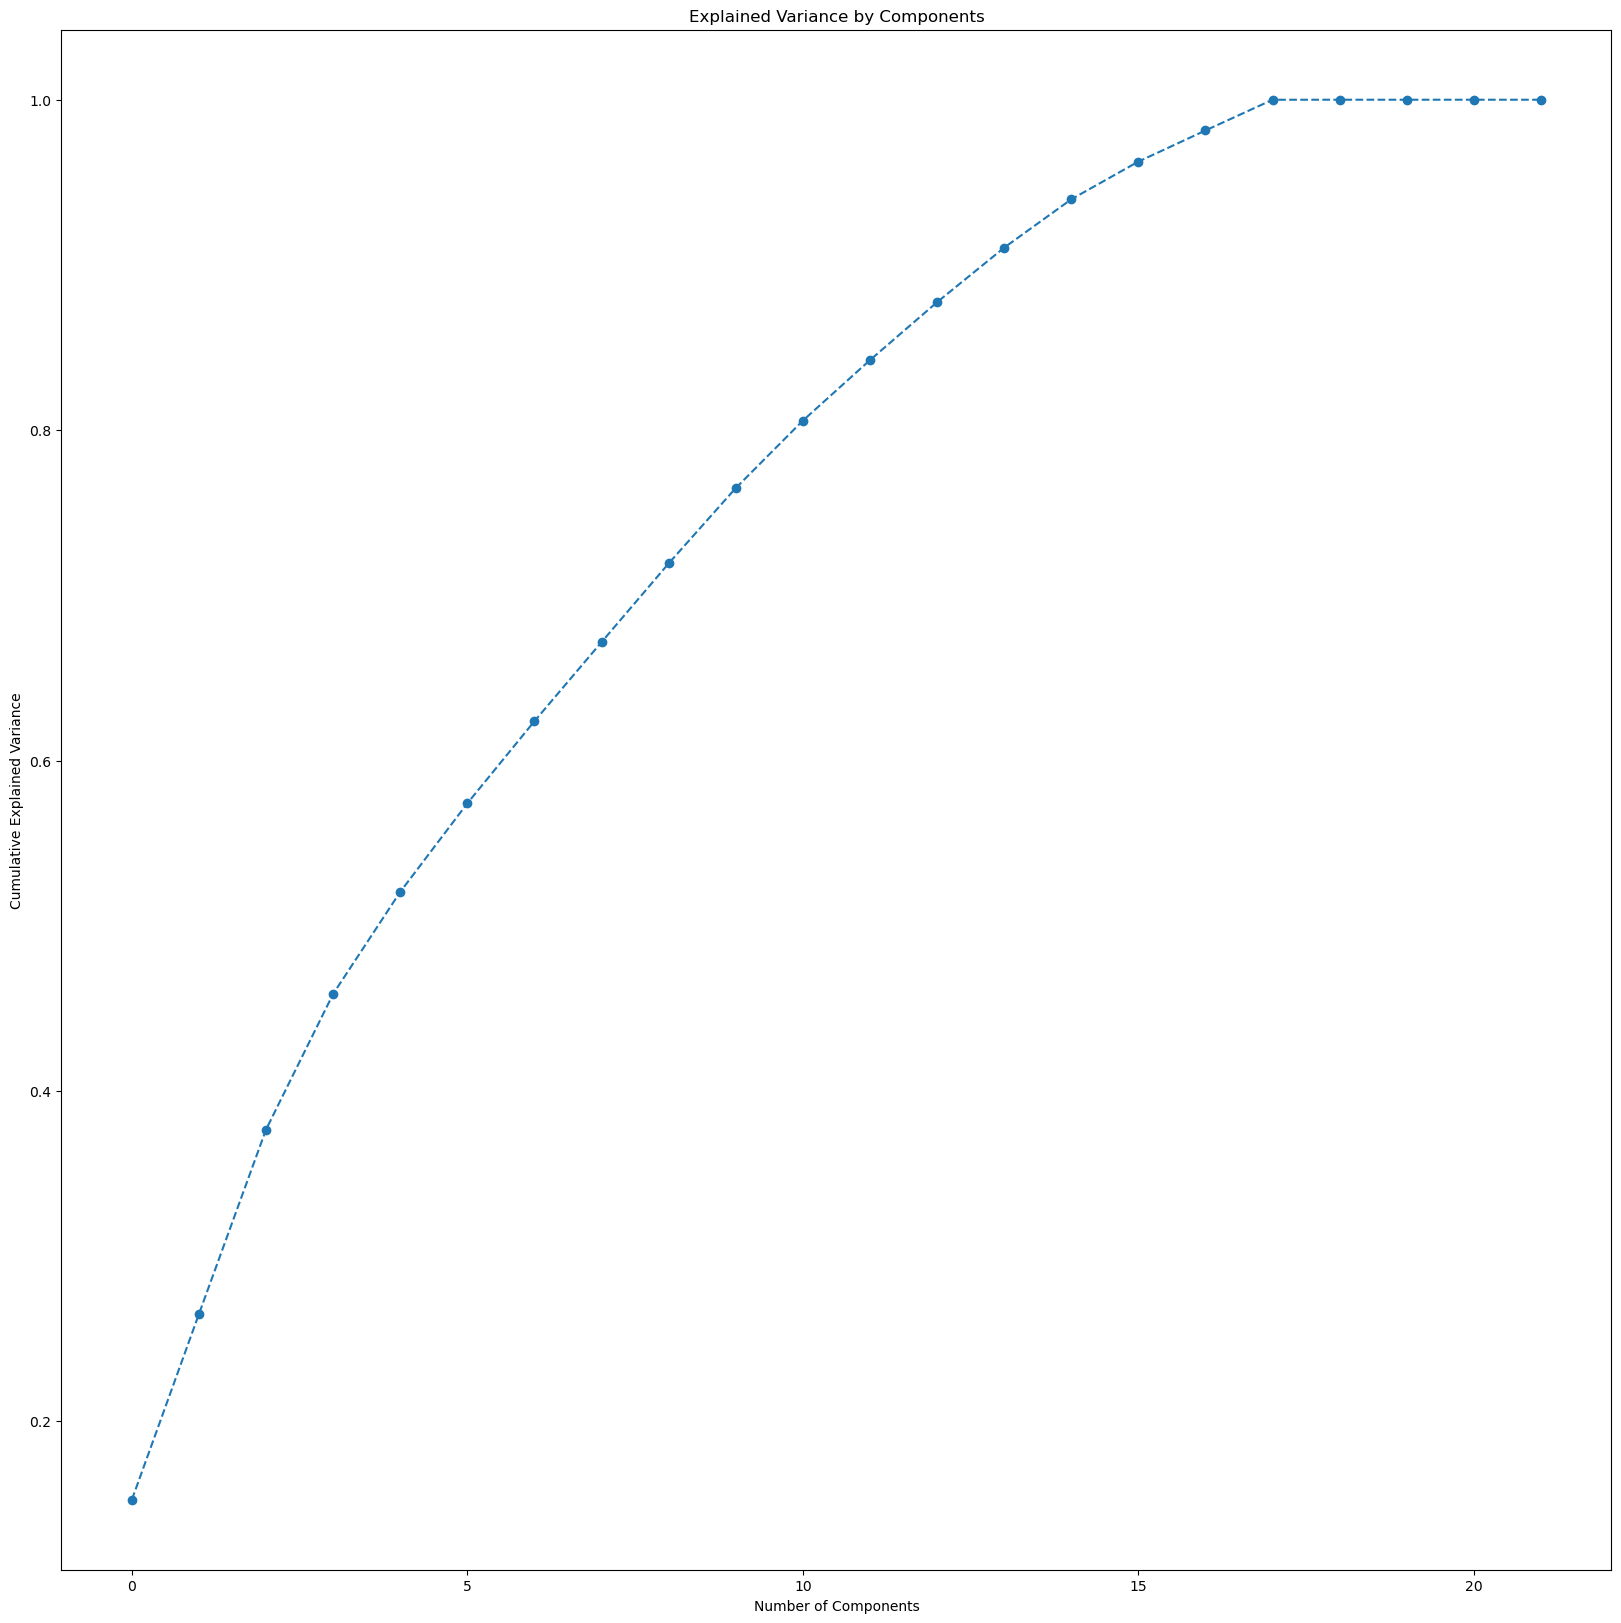

In [33]:
plt.figure(figsize = (20, 20))
plt.plot(range(0,22), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [34]:
# Rule of thumb is to keep at least 80% of variance, so we keep 10 components.
pca = PCA(n_components = 10)

In [35]:
# Fit model to selected number of components
pca.fit(df_standardized)

PCA(n_components=10)

In [36]:
# Taking only calculated resulting components
pca.transform(df_standardized)

array([[-0.46428546, -1.10778335,  0.60558231, ...,  1.82392965,
        -0.1058486 , -0.80096965],
       [ 0.99227748, -0.91991147,  1.33293523, ...,  1.54675508,
         0.46913316, -1.81939849],
       [-0.73567972, -1.05675142, -0.30987384, ...,  2.02237969,
         0.02438513,  0.33524294],
       ...,
       [ 1.63125241,  0.58161199,  0.74249764, ..., -1.44359533,
         0.00635731,  0.22306761],
       [-0.13340404,  0.11892466, -1.27144431, ...,  0.23823515,
        -0.05094534, -0.97438876],
       [-0.51295943,  0.04975187, -1.55760211, ...,  0.14724759,
         0.02466829, -0.92541437]])

In [37]:
scores_pca = pca.transform(df_standardized)

### Elbow Technique for K-Means Clustering

In [64]:
# Defining range of number of clusters
num_cl = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defining k-means clusters in range

In [65]:
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))]
score

[-992644.0292921911,
 -874035.1511776248,
 -783011.51980883,
 -708658.2821336224,
 -645699.0385668317,
 -604255.4695522946,
 -557722.0230595155,
 -517476.18096922326,
 -484923.1015889161,
 -463360.47936135245,
 -438403.76751287264,
 -421432.8104074158,
 -408497.5367484608,
 -393927.33864485007,
 -383324.35085759516,
 -373081.42662721296,
 -362892.14912833634,
 -354469.28444123606,
 -345574.9446915271]

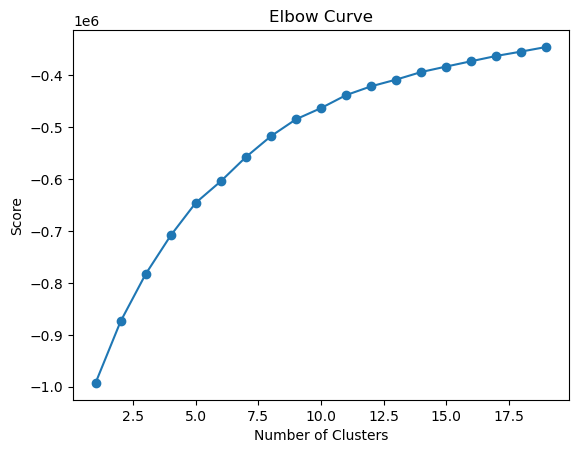

In [66]:
# Plot the Elbow curve

pl.plot(num_cl, score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

- The curve begins to flatten after the 6 mark, so we use 6 clusters.

### K-means Clustering

In [67]:
# Create the k-means object
kmeans = KMeans(n_clusters = 6)

In [68]:
# Fit the data to the kmeans object
kmeans.fit(scores_pca)

KMeans(n_clusters=6)

In [69]:
df_checkedout['clusters'] = kmeans.fit_predict(df_checkedout)

In [70]:
df_checkedout.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay_time,hotel_type,clusters
0,0,342,2015,7,27,1,0,0,2,0,0,0,0,0,3,0,0.0,0,0,2,0,0,1
1,0,737,2015,7,27,1,0,0,2,0,0,0,0,0,4,0,0.0,0,0,2,0,0,1
2,0,0,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,107.0,0,0,2,2,0,5
3,0,9,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,103.0,0,1,2,2,0,5
4,0,35,2015,7,27,1,0,4,2,0,0,0,0,0,0,0,145.0,0,0,2,4,0,5


In [71]:
df_checkedout['clusters'].value_counts()

4    18513
5    14928
0    11541
2     8744
3     5120
1     2951
Name: clusters, dtype: int64

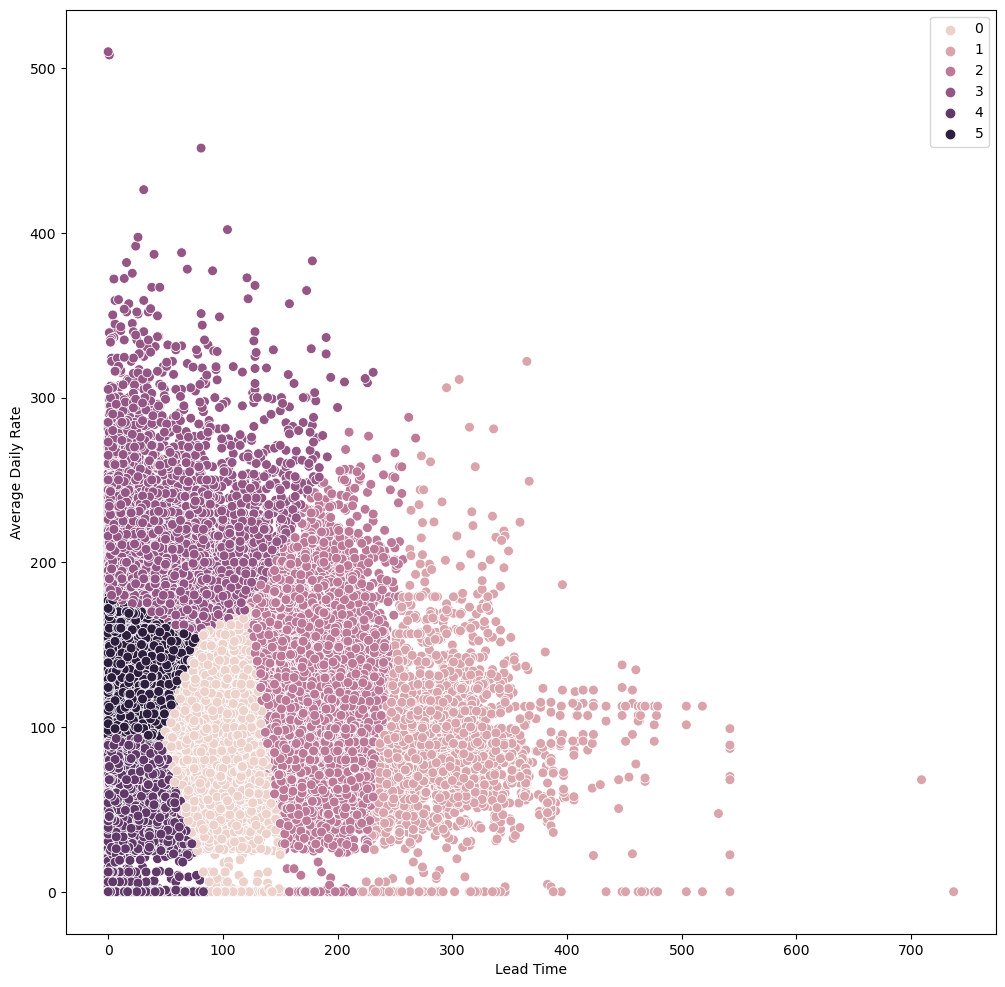

In [72]:
# Plot clusters for the "Lead Time" and "Average Daily Rate" variables.

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_checkedout['lead_time'], y=df_checkedout['average_daily_rate'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Lead Time') # Label x-axis.
plt.ylabel('Average Daily Rate') # Label y-axis.
plt.show()

- Lead Time vs Average Daily Rate.
- The clusters here makes sense because they seem to be mostly neatly broken down by lead time. There are distinct breaks every 100 days, up until 300 where it just encompasses the rest of the lead times.
- Average daily rate is a bit more chaotic as it doesn't fall neatly into each break. What I find interesting is the gap that appeared.

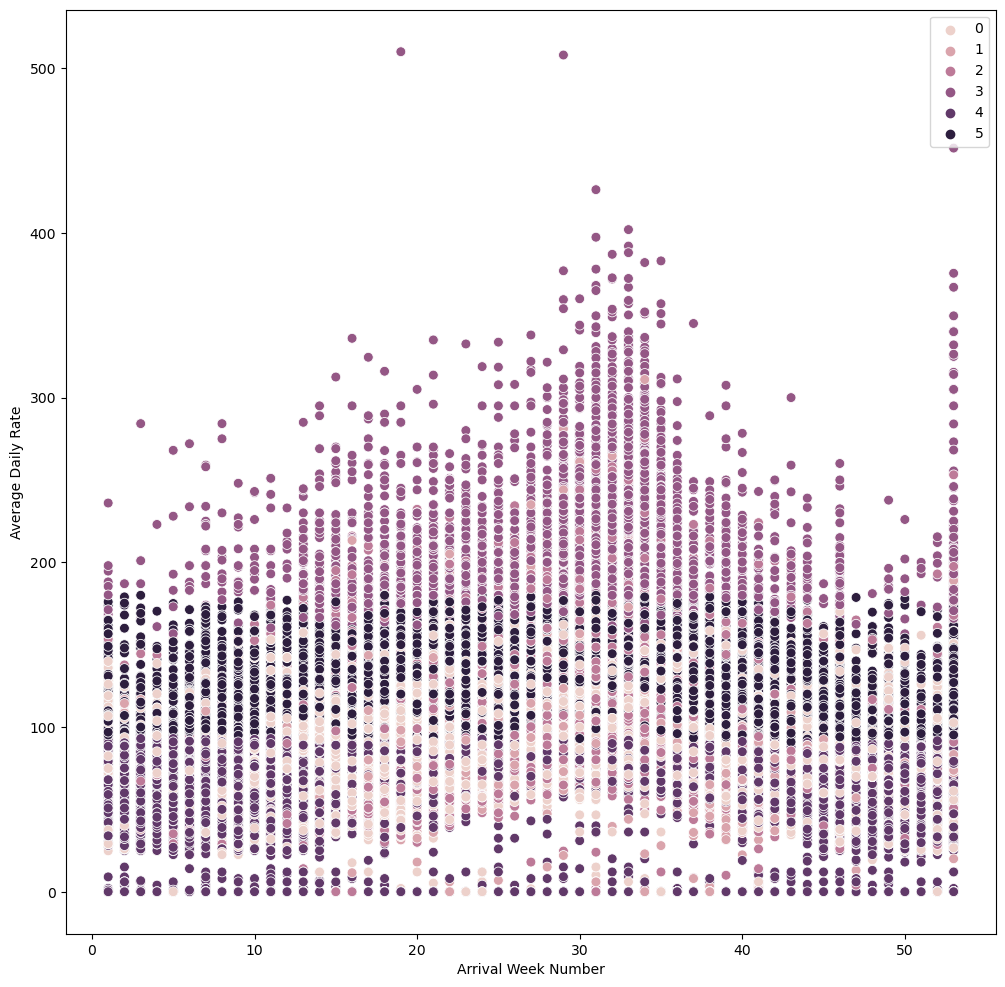

In [73]:
# Plot clusters for the "Arrival Week Number" and "Average Daily Rate" variables.

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_checkedout['arrival_date_week_number'], y=df_checkedout['average_daily_rate'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Arrival Week Number') # Label x-axis.
plt.ylabel('Average Daily Rate') # Label y-axis.
plt.show()

- Arrival Week Number vs Average Daily Rate
- No obvious clusters. Breakpoints in average daily rate, but not in arrival week number.

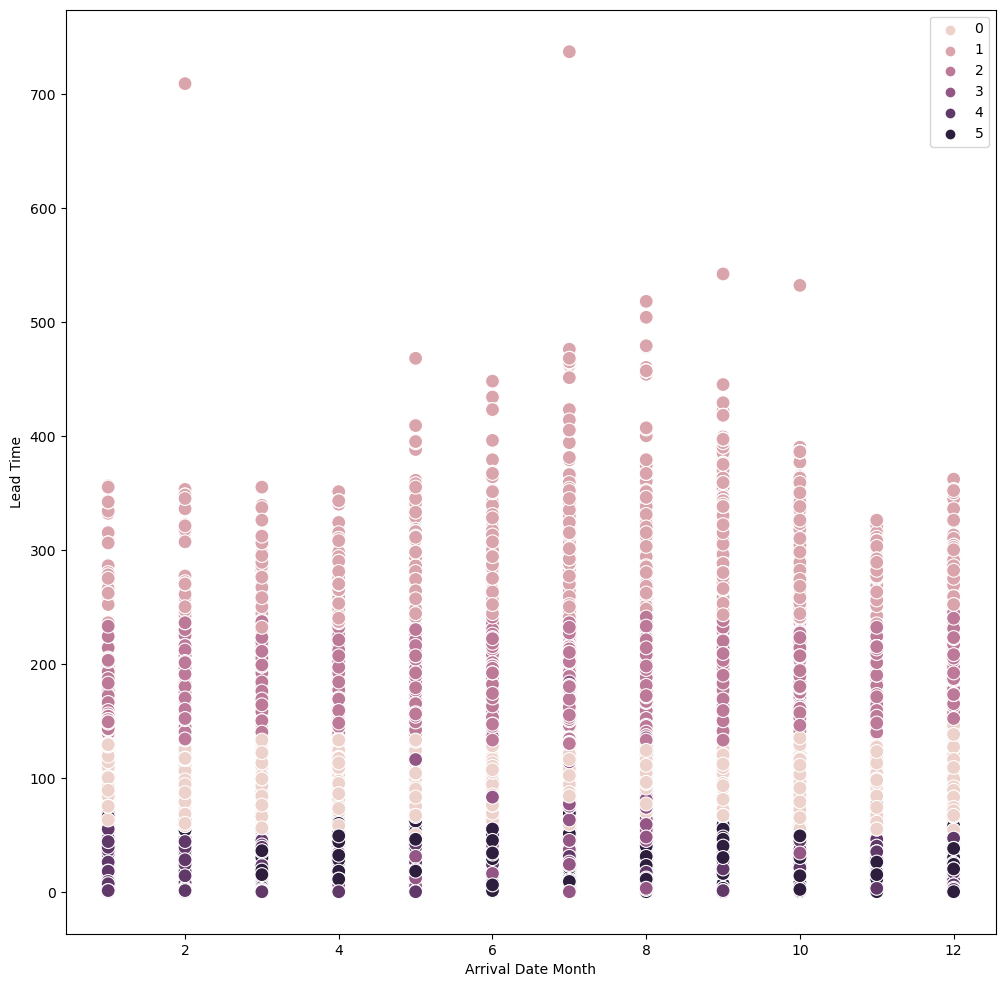

In [75]:
# Plot clusters for the "Lead Time" and "Arrival Date Month" variables.

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_checkedout['arrival_date_month'], y=df_checkedout['lead_time'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.s

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Arrival Date Month') # Label x-axis.
plt.ylabel('Lead Time') # Label y-axis.
plt.show()

- Arrival Date Month vs Lead Time
- Clusters more visible by Lead Time over Arrival Date Month.

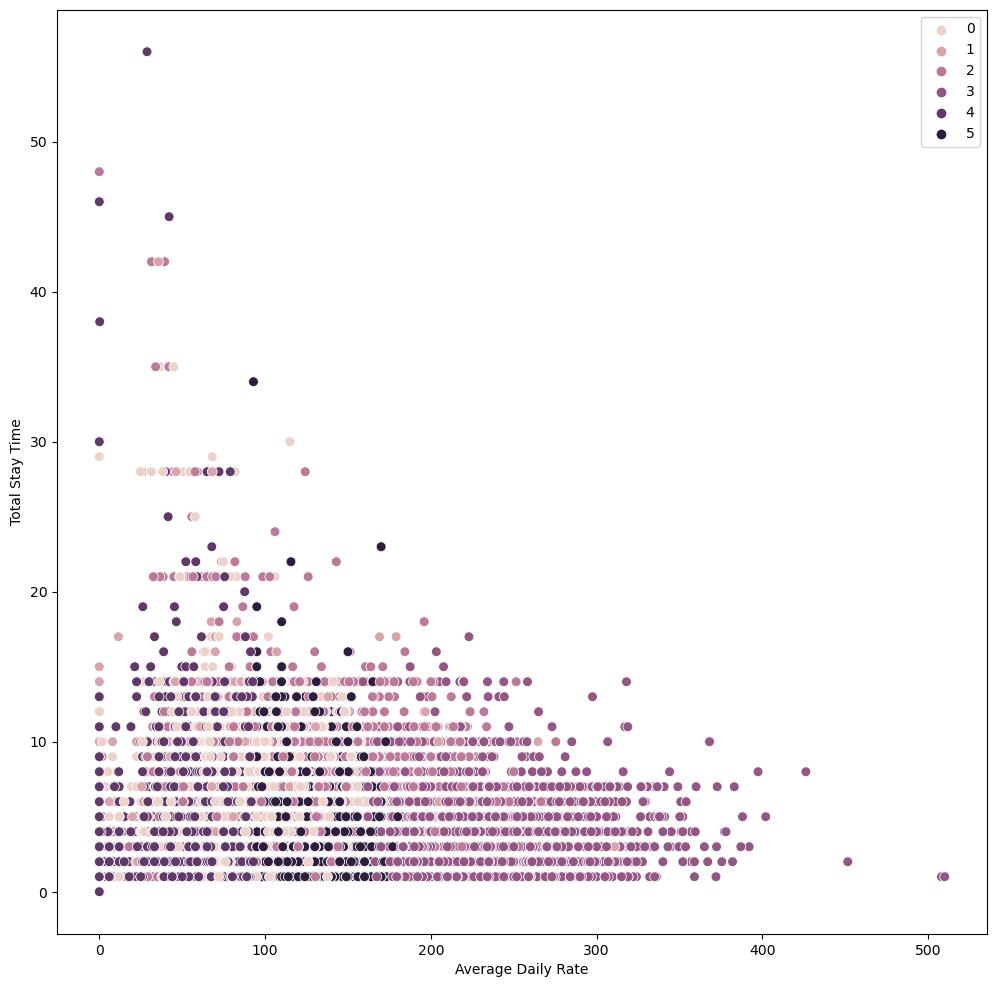

In [78]:
# Plot clusters for the "Total Stay Time" and "Average Daily Rate" variables.

plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=df_checkedout['average_daily_rate'], y=df_checkedout['total_stay_time'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.s

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average Daily Rate') # Label x-axis.
plt.ylabel('Total Stay Time') # Label y-axis.
plt.show()

- Total Stay Time vs Average Daily Rate
- Somewhat hard to tell. Later clusters in Average Daily Rate easier to identify.

In [86]:
# Examine descriptive cluster statistics
df_checkedout.groupby('clusters').agg({'lead_time':['mean', 'median'], 
                                     'arrival_date_month':['mean', 'median'],
                                     'arrival_date_week_number':['mean', 'median'],
                                     'booking_changes':['mean', 'median'],
                                     'days_in_waiting_list':['mean', 'median'],
                                     'average_daily_rate':['mean', 'median'],
                                     'total_guests':['mean', 'median'],
                                     'total_stay_time':['mean', 'median']                                   
                                     })

lead_time        arrival_date_month         \
                mean median               mean median   
clusters                                                
0          92.719262   91.0           6.288450    6.0   
1         299.561505  286.0           7.353440    7.0   
2         178.358646  175.0           6.927951    7.0   
3          47.532422   36.0           7.195117    8.0   
4          14.911468    7.0           5.805704    4.0   
5          18.443663   13.0           6.689510    7.0   

         arrival_date_week_number        booking_changes         \
                             mean median            mean median   
clusters                                                          
0                       26.047050   24.0        0.292696    0.0   
1                       30.557777   30.0        0.591325    0.0   
2                       28.791057   29.0        0.420174    0.0   
3                       29.929297   31.0        0.378516    0.0   
4                       23.959326   17.0        0.260196    0.0   
5                       27.816117   28.0        0.242028    0.0   

         days_in_waiting_list        average_daily_rate         total_guests  \
                         mean median               mean  median         mean   
clusters                                                                       
0                    0.529590    0.0          92.597414   90.60     2.007365   
1                    6.397154    0.0          87.522403   84.80     1.992884   
2                    1.183783    0.0         109.678111  104.85     2.164799   
3                    0.099219    0.0         212.127836  202.00     2.717383   
4                    0.058824    0.0          59.055274   65.00     1.691892   
5                    0.024853    0.0         126.441598  124.00     1.994306   

                total_stay_time         
         median            mean median  
clusters                                
0           2.0        4.189325    4.0  
1           2.0        5.460861    5.0  
2           2.0        4.999771    4.0  
3           3.0        3.639258    3.0  
4           2.0        2.633555    2.0  
5           2.0        2.748794    2.0

In [87]:
df_checkedout['clusters'].value_counts()

4    18513
5    14928
0    11541
2     8744
3     5120
1     2951
Name: clusters, dtype: int64

- In regards to Lead Time, Clusters 1 and 2 had the highest lead times, and Clusters 3, 4, and 5 had the lowest.
- All clusters seemed to have very similar arrival dates, except for Cluster 4, which typically arrived earlier.
- All clusters did not really make many booking changes.
- Cluster 1 had a very high number of days in the waiting list, with an average of 6, compared to every other cluster with 1 or less.
- Cluster 3 had the highest average daily rate, at around 200. This did not translate to the length of stay however, as they were right in the middle. They did, however, have more guests on average.
- Clusters 5 and 2 were the next highest in average daily rate. While Cluster 5 did spend more on average, Cluster 2 typically stayed longer and had more guests.

- I have yet to look into the breakdown of City Hotels compared to Resort Hotels, which I would like to do if possible.
- I feel as if looking into this breakdown would help future insights.